In [2]:
# !pip install opencv-python==4.6.0.66
# !sudo apt install tesseract-ocr
# !pip install pytesseract==0.3.9


In [3]:
# ! git clone https://github.com/sthemonica/text-recognize


[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


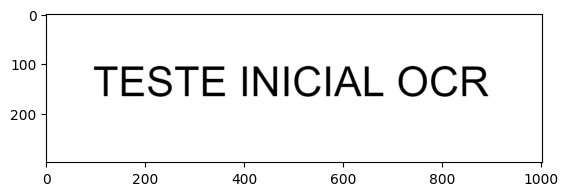

Texto da Imagem
TESTE INICIAL OCR



In [4]:
import pytesseract as pt
import numpy as np
import cv2
import matplotlib.pyplot as plt


img = cv2.imread("text-recognize/Imagens/Aula1-teste.png")
print(img)
plt.imshow(img, "gray")
plt.show()

texto = pt.image_to_string(img)
print("Texto da Imagem")
print(texto)

In [27]:
pt.__version__

'0.3.9'

G

Tesseract OCR



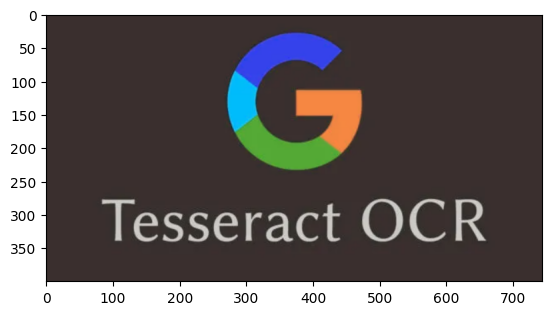

In [5]:
imagem_google = cv2.imread("text-recognize/Imagens/Aula1-ocr.png")

plt.imshow(imagem_google)

texto_google1 = pt.image_to_string(imagem_google)

print(texto_google1)


G

Tesseract OCR



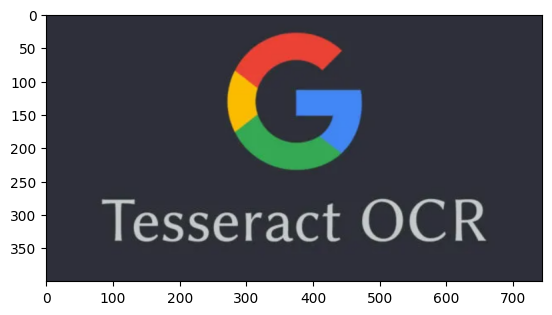

In [6]:
imagem_g_rgb = cv2.cvtColor(imagem_google, cv2.COLOR_BGR2RGB)
plt.imshow(imagem_g_rgb)

texto_google2 = pt.image_to_string(imagem_g_rgb)

print(texto_google2)


G

Tesseract OCR



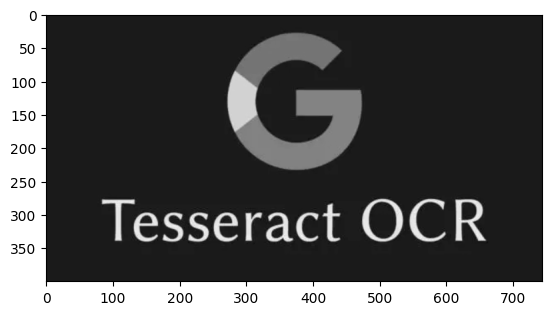

In [7]:
imagem_g_gray = cv2.cvtColor(imagem_google, cv2.COLOR_BGR2GRAY)
plt.imshow(imagem_g_gray, "gray")

texto_google3 = pt.image_to_string(imagem_g_gray)

print(texto_google3)


Undersampling

E uma técnica que consiste em manter todos os dados da classe com menor frequéncia e
diminuir a quantidade dos que estdo na classe de maior frequéncia, fazendo com que as
observagées no conjunto possuam dados com a variavel alvo equilibrada.



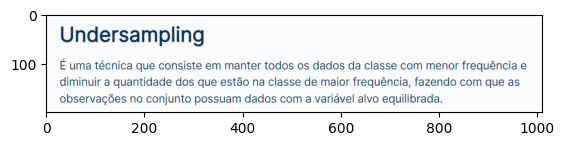

In [8]:
imagem = cv2.imread("text-recognize/Imagens/Aula2-undersampling.png")
img_under = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(img_under)
texto = pt.image_to_string(img_under)
print(texto)

In [9]:
!tesseract --list-langs

List of available languages in "C:\Program Files\Tesseract-OCR/tessdata/" (3):
eng
osd
por


In [10]:
# !apt-get install tesseract-ocr-por

In [11]:
!tesseract --list-langs

List of available languages in "C:\Program Files\Tesseract-OCR/tessdata/" (3):
eng
osd
por


In [12]:
texto = pt.image_to_string(img_under, lang="por")
print(texto)

Undersampling

É uma técnica que consiste em manter todos os dados da classe com menor frequência e
diminuir a quantidade dos que estão na classe de maior frequência, fazendo com que as
observações no conjunto possuam dados com a variável alvo equilibrada.



# PSM

In [13]:
!tesseract --help-psm

Page segmentation modes:
  0    Orientation and script detection (OSD) only.
  1    Automatic page segmentation with OSD.
  2    Automatic page segmentation, but no OSD, or OCR. (not implemented)
  3    Fully automatic page segmentation, but no OSD. (Default)
  4    Assume a single column of text of variable sizes.
  5    Assume a single uniform block of vertically aligned text.
  6    Assume a single uniform block of text.
  7    Treat the image as a single text line.
  8    Treat the image as a single word.
  9    Treat the image as a single word in a circle.
 10    Treat the image as a single character.
 11    Sparse text. Find as much text as possible in no particular order.
 12    Sparse text with OSD.
 13    Raw line. Treat the image as a single text line,
       bypassing hacks that are Tesseract-specific.


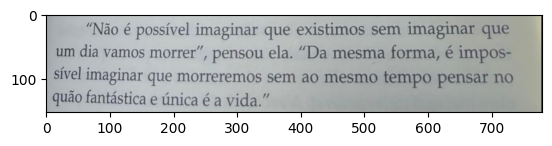

In [14]:
imagem = cv2.imread('text-recognize/Imagens/Aula2-trecho-livro.png')
img_trecho_livro = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(img_trecho_livro)


In [15]:
texto = pt.image_to_string(img_trecho_livro, lang="por")
print(texto)

“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



In [16]:

import os



# Criar uma pasta para os arquivos de idioma
language_folder = '/content/tessdata'
os.makedirs(language_folder, exist_ok=True)

# Baixar arquivos de idioma e movê-los para a pasta do Google Drive
languages = ['eng', 'por']  # Exemplo com inglês e português. Você pode adicionar outros idiomas conforme necessário.

for lang in languages:
    # Baixar arquivo de idioma
    # !wget -P $language_folder https://github.com/tesseract-ocr/tessdata/raw/main/{lang}.traineddata

    # # Mover o arquivo baixado para a pasta do Google Drive
    # os.rename(f'{language_folder}/{lang}.traineddata', f'{language_folder}/{lang}')
    pass
# Listar arquivos de idioma na pasta do Google Drive
print("Arquivos de idioma baixados:")
print(os.listdir(language_folder))

Arquivos de idioma baixados:
[]


In [17]:
import os
print(os.listdir('tessdata'))


['eng.traineddata', 'osd.traineddata', 'por.traineddata']


In [18]:
config_tesseract = '--tessdata-dir tessdata --psm 6'
texto = pt.image_to_string(img_trecho_livro, lang='por', config=config_tesseract)
print(texto)


“Não é possível imaginar que existimos sem imaginar que
um dia vamos morrer”, pensou ela. “Da mesma forma, é impos-
sível imaginar que morreremos sem ao mesmo tempo pensar no
quão fantástica e única é a vida.”



In [19]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pt.image_to_string(img_trecho_livro, lang='por', config=config_tesseract)
print(texto)


In [20]:
config_tesseract = '--tessdata-dir tessdata --psm 8'
texto = pt.image_to_string(img_trecho_livro, lang='por', config=config_tesseract)
print(texto)

ªfâ%êâãããââª%%?ªíí?Éªggígãggãââ*



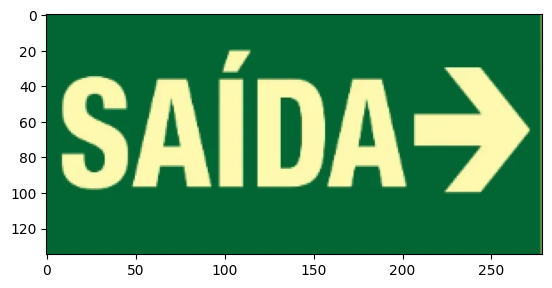

In [21]:
imagem = cv2.imread('text-recognize/Imagens/Aula2-Saida.png')
img_saida = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(img_saida)

In [22]:
config_tesseract = '--tessdata-dir tessdata --psm 7'
texto = pt.image_to_string(img_saida, lang='por', config=config_tesseract)
print(texto)

SAÍDAS



# PIL

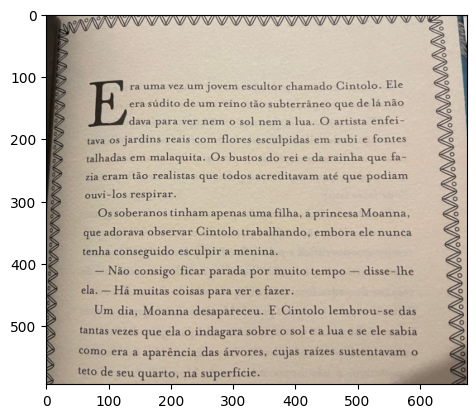

In [23]:
from PIL import Image

imagem_livro = Image.open("text-recognize\Imagens\Aula2-livro.png")
plt.imshow(imagem_livro)

## Métodos utilizado

- pt.image_to_osd(imagem_livro)

OSD significa Orientação e Detecção de Script e seu retorno são metadados da imagem

In [25]:
config_tesseract = "--tessdata-dir tessdata --psm 0"
print(pt.image_to_osd(imagem_livro, config= config_tesseract))

imagem_livro.close()

TesseractError: (1, 'Estimating resolution as 127 UZN file C:\\Users\\ruben\\AppData\\Local\\Temp\\tess_86zg71kv loaded. Warning. Invalid resolution 0 dpi. Using 70 instead. Too few characters. Skipping this page Error during processing.')

In [ ]:
with Image.open("text-recognize\Imagens\Aula2-livro.png") as img:
    img.rotate(90).show()

### - Selecionando Textos

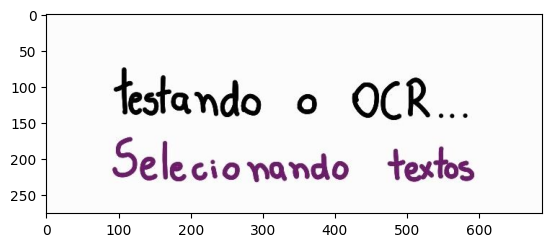

In [ ]:
imagem = cv2.imread("text-recognize\Imagens\Aula3-testando.png")
img_saida = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(img_saida)

In [ ]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pt.image_to_data(img_saida, lang='por', config=config_tesseract, output_type=pt.Output.DICT)
print(resultado)
resultado

{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5], 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2], 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2], 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474], 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184], 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120], 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49], 'conf': [-1, -1, -1, -1, 65, 91, 25, -1, 84, 75], 'text': ['', '', '', '', 'Testando', 'o', 'OCR..', '', 'Selecionando', 'textos']}


{'level': [1, 2, 3, 4, 5, 5, 5, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'par_num': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 1, 1, 2, 2, 2],
 'word_num': [0, 0, 0, 0, 1, 2, 3, 0, 1, 2],
 'left': [0, 92, 92, 94, 94, 348, 425, 92, 92, 474],
 'top': [0, 74, 74, 74, 74, 111, 88, 171, 171, 184],
 'width': [688, 502, 502, 491, 204, 28, 160, 502, 328, 120],
 'height': [276, 159, 159, 73, 69, 28, 59, 62, 62, 49],
 'conf': [-1, -1, -1, -1, 65, 91, 25, -1, 84, 75],
 'text': ['',
  '',
  '',
  '',
  'Testando',
  'o',
  'OCR..',
  '',
  'Selecionando',
  'textos']}

In [ ]:
min_conf = 40   #@param {type: 'slider', min: 0, max: 100}

In [ ]:
def caixa_texto(resultado, img, cor=(0,100,255)):
    for i in range(len(resultado['text'])):
        confianca = int(resultado['conf'][i])
        if confianca > 24:
            x = resultado['left'][i]
            y = resultado['top'][i]
            w = resultado['width'][i]
            h = resultado['height'][i]

            cv2.rectangle(img, (x,y), (x+w,y+h), cor, 2)

            texto = resultado['text'][i]
            cv2.putText(img, texto, (x,y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,100, 0))
    return img


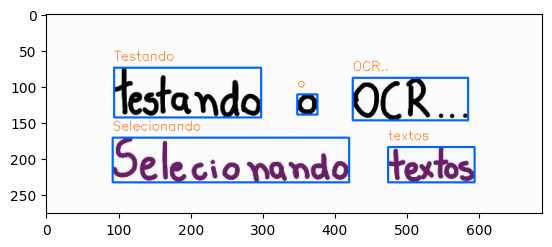

In [ ]:
imagem_copia = img_saida.copy()
imagem_marcada = caixa_texto(resultado, imagem_copia)

plt.imshow(imagem_marcada)

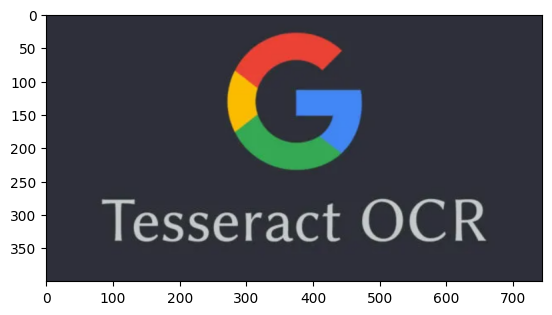

In [ ]:
img = cv2.imread("text-recognize/Imagens/Aula1-ocr.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [ ]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pt.image_to_data(
    rgb, config=config_tesseract, lang="por", output_type=pt.Output.DICT
)
resultado

{'level': [1, 2, 3, 4, 5, 2, 3, 4, 5, 5],
 'page_num': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 'block_num': [0, 1, 1, 1, 1, 2, 2, 2, 2, 2],
 'par_num': [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 'line_num': [0, 0, 0, 1, 1, 0, 0, 1, 1, 1],
 'word_num': [0, 0, 0, 0, 1, 0, 0, 0, 1, 2],
 'left': [0, 272, 272, 272, 272, 84, 84, 84, 84, 474],
 'top': [0, 28, 28, 28, 28, 277, 277, 277, 278, 277],
 'width': [744, 202, 202, 202, 202, 576, 576, 576, 357, 186],
 'height': [400, 205, 205, 205, 205, 64, 64, 64, 63, 64],
 'conf': ['-1',
  '-1',
  '-1',
  '-1',
  '88.937424',
  '-1',
  '-1',
  '-1',
  '91.562912',
  '92.194664'],
 'text': ['', '', '', '', 'G', '', '', '', 'Tesseract', 'OCR']}

In [ ]:
from PIL import ImageFont, ImageDraw, Image

fonte = "text-recognize/Imagens/calibri.ttf"

In [ ]:
def escreve_texto(img, texto, x, y, fonte, tamanho_texto=32):
    fonte = ImageFont.truetype(fonte, tamanho_texto)
    img_pil = Image.fromarray(img)
    draw = ImageDraw.Draw(img_pil)
    draw.text((x, y - tamanho_texto+5), texto, font = fonte)
    img = np.array(img_pil)
    return img

In [ ]:
def caixa_texto(resultado, img, cor=(0, 100, 255)):
    for i in range(len(resultado["text"])):
        confianca = float(resultado["conf"][i])
        confianca = int(confianca)
        if confianca > 24:
            x = resultado["left"][i]
            y = resultado["top"][i]
            w = resultado["width"][i]
            h = resultado["height"][i]

            cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)

            texto = resultado["text"][i]
            img = escreve_texto(
                img, texto, x, y, fonte=fonte, 
            )
    return img

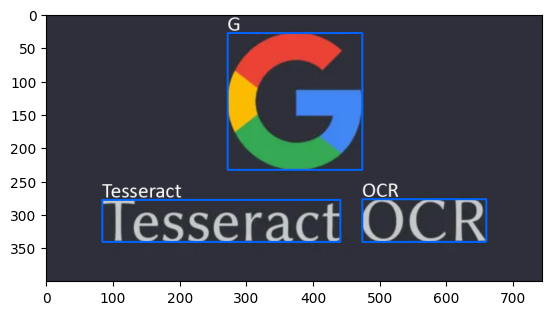

In [ ]:
imagem_copia = rgb.copy()
imagem_logo = caixa_texto(resultado, imagem_copia)

plt.imshow(imagem_logo)

In [ ]:
caminho_nova_imagem = "text-recognize\logos-tesseract\logo_tesseract.png"
imagem_bgr = cv2.cvtColor(imagem_logo, cv2.COLOR_RGB2BGR)
cv2.imwrite(caminho_nova_imagem, imagem_bgr)

True

# Aula 04

### Buscando informações


hattps://regexr.com

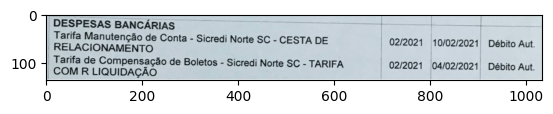

In [ ]:
import re
img = cv2.imread("text-recognize/Imagens/Aula4-tabela_teste.png")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [ ]:
config_tesseract = "--tessdata-dir tessdata"
resultado = pt.image_to_data(
    rgb, config=config_tesseract, lang="por", output_type=pt.Output.DICT
)
resultado['conf']
resultado['text']

['',
 '',
 '',
 '',
 'DESPESAS',
 'BANCÁRIAS',
 '',
 '',
 '',
 'Tarifa',
 'Manutenção',
 'de',
 'Conta',
 '-',
 'Sicredi',
 'Norte',
 'SC',
 '-',
 'CESTA',
 'DE',
 '02/2021',
 '10/02/2021',
 'Débito',
 'Aut.',
 '',
 'RELACIONAMENTO',
 '',
 'Tarifa',
 'de',
 'Compensação',
 'de',
 'Boletos',
 '-',
 'Sicredi',
 'Norte',
 'SC',
 '-',
 'TARIFA',
 '02/2021',
 '04/02/2021',
 'Débito',
 'Aut.',
 '',
 '',
 '',
 'COM',
 'R',
 'LIQUIDAÇÃO']

In [ ]:
padrao_data = "^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)|(0[1-9]|1[012])/(19|20)\d\d$"

In [ ]:
def caixa_texto(resultado, img, cor=(0, 100, 255)):
    datas =[]
    for i in range(len(resultado["text"])):
        confianca = float(resultado["conf"][i])
        confianca = int(confianca)
        if confianca > 24:
            
            x = resultado["left"][i]
            y = resultado["top"][i]
            w = resultado["width"][i]
            h = resultado["height"][i]


            texto = resultado["text"][i]
            if re.match(padrao_data, texto):
                cv2.rectangle(img, (x, y), (x + w, y + h), (255,0,0), 2)
                img = escreve_texto(
                    img,
                    texto,
                    x,
                    y,
                    fonte=fonte,
                    tamanho_texto=25
                )
                datas.append(texto)
            else:
                cv2.rectangle(img, (x, y), (x + w, y + h), cor, 2)
    print(datas)
    return img

['02/2021', '10/02/2021', '02/2021', '04/02/2021']


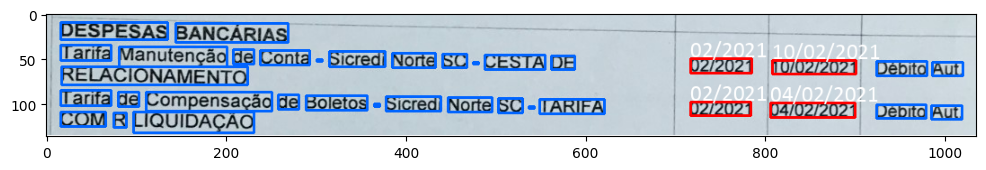

In [ ]:
imagem_copia = rgb.copy()
imagem_datas = caixa_texto(resultado, imagem_copia)

plt.figure(figsize=(12,12))
plt.imshow(imagem_datas)

## Cenários Naturais

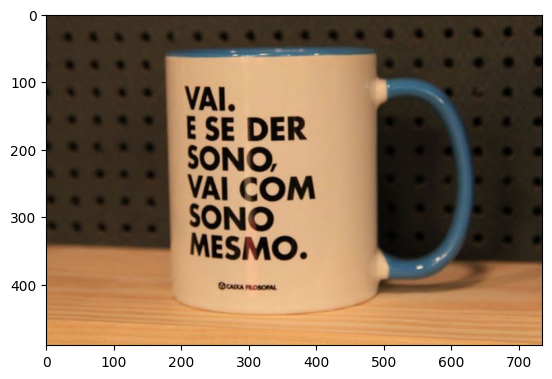

In [ ]:
img = cv2.imread("text-recognize/Imagens/Aula4-caneca2.jpg")
rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

In [ ]:
config_tesseract = "--tessdata-dir tessdata --psm 6"
resultado = pt.image_to_data(
    rgb, config=config_tesseract, lang="por", output_type=pt.Output.DICT
)
resultado

{'level': [1,
  2,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5,
  3,
  4,
  5,
  3,
  4,
  5,
  5],
 'page_num': [1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'block_num': [0,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'par_num': [0,
  0,
  1,
  1,
  1,
  1,
  2,
  2,
  2,
  2,
  2,
  3,
  3,
  3,
  4,
  4,
  4,
  4,
  5,
  5,
  5,
  6,
  6,
  6,
  6],
 'line_num': [0,
  0,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1,
  0,
  1,
  1,
  0,
  1,
  1,
  1],
 'word_num': [0,
  0,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  2,
  3,
  0,
  0,
  1,
  0,
  0,
  1,
  2,
  0,
  0,
  1,
  0,
  0,
  1,
  2],
 'left': [0,
  206,
  206,
  206,
  206,
  584,
  209,
  209,
  209,
  237,
  299,
  210,
  210,
  210,
  210,
  210,
  210,
  287,
  213,
  213,
  213,
  214,
  214,
  214,
 

In [ ]:
def caixa_texto(resultado, img, cor=(0, 100, 255)):
    datas = []
    for i in range(len(resultado["text"])):
        confianca = float(resultado["conf"][i])
        confianca = int(confianca)
        if confianca > 50:

            x = resultado["left"][i]
            y = resultado["top"][i]
            w = resultado["width"][i]
            h = resultado["height"][i]

            texto = resultado["text"][i]
            cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)
            img = escreve_texto(img, texto, x, y, fonte=fonte, tamanho_texto=20)
            
    return img

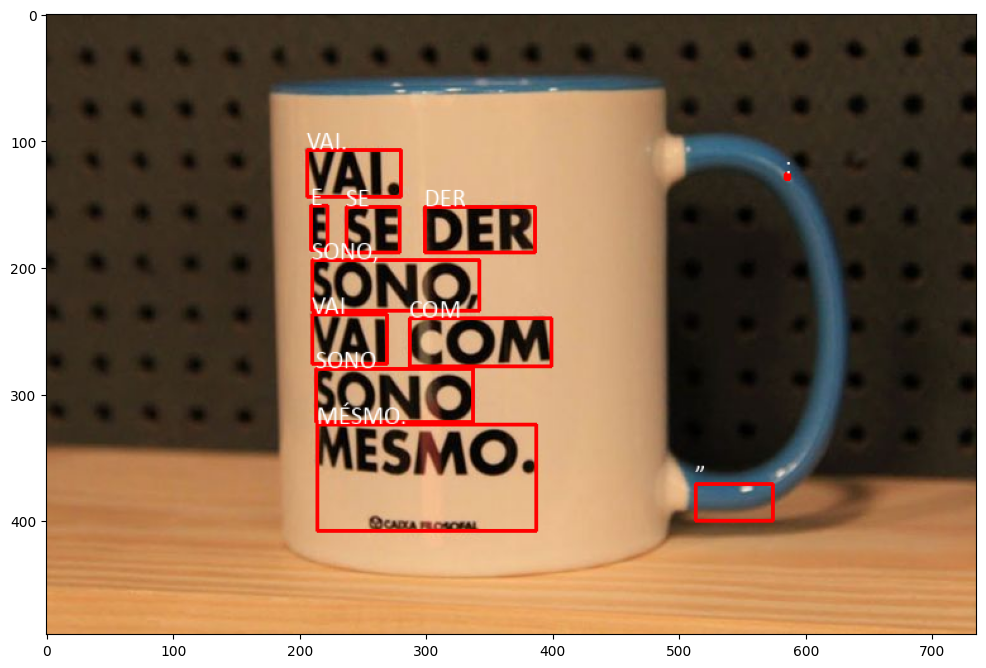

In [ ]:
imagem_copia = rgb.copy()
imagem_caneca = caixa_texto(resultado, imagem_copia)

plt.figure(figsize=(12, 12))
plt.imshow(imagem_caneca)

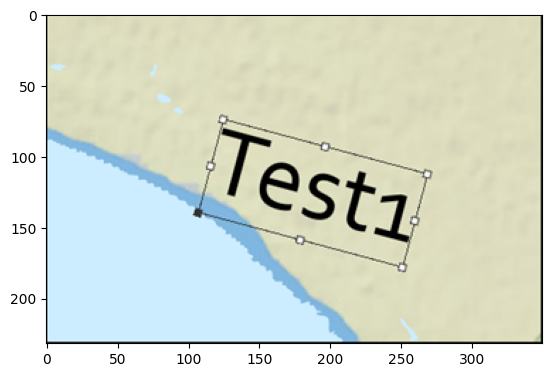

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ruben\\AppData\\Local\\Temp\\tess_okfi85qm.osd'

In [ ]:
import pytesseract as pt
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image


# pt.pytesseract.tesseract_cmd = r"C:/Program Files/Tesseract-OCR"
# img = cv2.imread("text-recognize/Imagens/Aula1-teste.png")
# img = cv2.imread("text-recognize\Imagens\Aula2-undersampling.png")
# img = cv2.imread("text-recognize/Imagens/imagem-torta.png")
img = Image.open("text-recognize/Imagens/imagem-torta.png")
# under = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# print(img)
plt.imshow(img)
plt.show()
config_tesseract = "--tessdata-dir tessdata --psm 6"
# texto = pt.image_to_string(under, lang="por", config="--tessdata-dir tessdata --psm 6")
# print(texto)
texto = pt.image_to_osd(img, config=config_tesseract, lang="osd", output_type= pt.Output.STRING)
print(texto)
img.close()